## Import all cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile
import scipy.stats as st
import math
from wordcloud import WordCloud, STOPWORDS


# suppress futurewarnings from statistical packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.ticker as mticker
from tabulate import tabulate
import plotly
import plotly.express as px

plotly.offline.init_notebook_mode()
#read data

zip_file = "../Dataset/AB_US_2020.zip"
try:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall("Dataset/unZipped/")
        print("Extracted all")
except:
    print("Invalid file")
    
airbnbDS = pd.read_csv("Dataset/unZipped/AB_US_2020.csv")

#Going to drop neighbourhood_group because of have the values are null. 
#For both name and host name I will fill the empty slots with "N/A", 
#there is very few missing and I do not think name will be very important to regesion on price. 
#For all null values in reviews_per_month will be replaced with 0. 
#For all last review that are null will be replaced with "00/00/00"


airbnbDS = airbnbDS.drop("neighbourhood_group", axis = 1)

airbnbDS = airbnbDS.fillna(value= {'name': 'N/A', 'host_name':'N/A', 'reviews_per_month': 0, 'last_review' : '00/00/00'})

room_ID_dic = {'Entire home/apt': 1, 'Private room': 2,'Shared room': 3, 'Hotel room': 4}

airbnbDS['room_type_ID'] = airbnbDS['room_type'].apply(lambda x: room_ID_dic[x])

city_ID_dic = {'Asheville' : 1, 'Austin' : 2, 'Boston' :3, 'Broward County' :4, 'Cambridge':5,
       'Chicago':6, 'Clark County':7, 'Columbus':8, 'Denver':9, 'Hawaii':10,
       'Jersey City':11, 'Los Angeles':12, 'Nashville':13, 'New Orleans':14,
       'New York City':15, 'Oakland':16, 'Pacific Grove':17, 'Portland':18,
       'Rhode Island':19, 'Salem':20, 'San Clara Country':21, 'San Diego':22,
       'San Francisco':23, 'San Mateo County':24, 'Santa Cruz County':25,
       'Seattle':26, 'Twin Cities MSA':27, 'Washington D.C.':28}


airbnbDS['city_ID'] = airbnbDS['city'].apply(lambda x: city_ID_dic[x])

Extracted all


C:\Users\clineman\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [2]:
airbnbDS

id                                               name  \
0          38585    Charming Victorian home - twin beds + breakfast   
1          80905                                   French Chic Loft   
2         108061  Walk to stores/parks/downtown. Fenced yard/Pet...   
3         155305                 Cottage! BonPaul + Sharky's Hostel   
4         160594                                Historic Grove Park   
...          ...                                                ...   
226025  45506143                          DC Hidden In Plain "Site"   
226026  45511428  DC 3 BR w/ screen porch 3 blck to metro w/ par...   
226027  45514685  Charming Penthouse Apt w/ Rooftop Terrace in L...   
226028  45516412                Adams Morgan/Nat'l Zoo 1 BR Apt #32   
226029  45517735    Beautiful large one-bedroom w/ washer and dryer   

          host_id  host_name  \
0          165529    Evelyne   
1          427027    Celeste   
2          320564       Lisa   
3          746673    BonPaul   
4          769252  Elizabeth   
...           ...        ...   
226025   25973146      Marci   
226026  231133074     Thomas   
226027   33758935     Bassem   
226028   23193071    Michael   
226029   17789858       Adam   

                                            neighbourhood   latitude  \
0                                                   28804  35.651460   
1                                                   28801  35.597790   
2                                                   28801  35.606700   
3                                                   28806  35.578640   
4                                                   28801  35.614420   
...                                                   ...        ...   
226025  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.903880   
226026                      Brookland, Brentwood, Langdon  38.920820   
226027                                 Shaw, Logan Circle  38.911170   
226028     Kalorama Heights, Adams Morgan, Lanier Heights  38.926630   
226029  Edgewood, Bloomingdale, Truxton Circle, Eckington  38.911569   

        longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -82.627920     Private room     60               1                138   
1      -82.555400  Entire home/apt    470               1                114   
2      -82.555630  Entire home/apt     75              30                 89   
3      -82.595780  Entire home/apt     90               1                267   
4      -82.541270     Private room    125              30                 58   
...           ...              ...    ...             ...                ...   
226025 -77.029730  Entire home/apt    104               1                  0   
226026 -76.990980  Entire home/apt    151               2                  0   
226027 -77.033540  Entire home/apt    240               2                  0   
226028 -77.044360  Entire home/apt     60              21                  0   
226029 -77.009431  Entire home/apt     79               7                  0   

       last_review  reviews_per_month  calculated_host_listings_count  \
0         16/02/20               1.14                               1   
1         07/09/20               1.03                              11   
2         30/11/19               0.81                               2   
3         22/09/20               2.39                               5   
4         19/10/15               0.52                               1   
...            ...                ...                             ...   
226025    00/00/00               0.00                               2   
226026    00/00/00               0.00                               1   
226027    00/00/00               0.00                               1   
226028    00/00/00               0.00                               5   
226029    00/00/00               0.00                               2   

        availability_365             city  room_type_ID  city_ID  
0     

## visulizations

Word cloud to show the most frequently used words in the description name

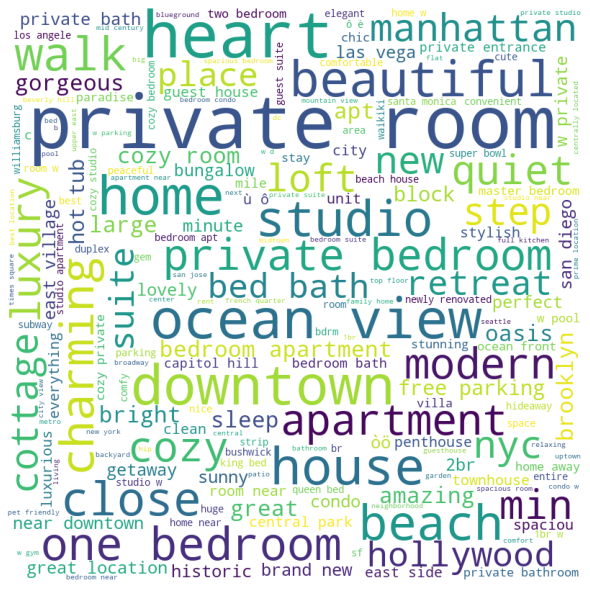

In [3]:
comment = ''
stopwords = set(STOPWORDS)

for i in airbnbDS['name']:
    i = str(i)
    
    tocken = i.split()
    
    for j in range(len(tocken)):
        tocken[j] = tocken[j].lower()
        
    comment += " ".join(tocken)+ " "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Heat map to see if there is any correlations between price and all other numberic columns

<AxesSubplot:>

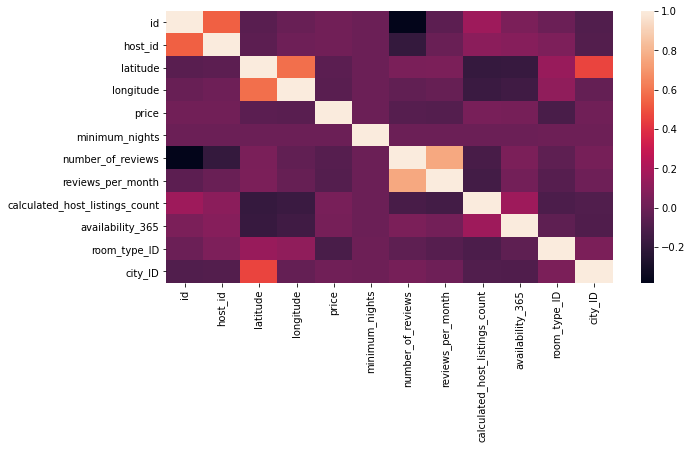

In [4]:
plt.figure(figsize = (10,5))
sns.heatmap(airbnbDS.corr())

Showing prices compared to other categories

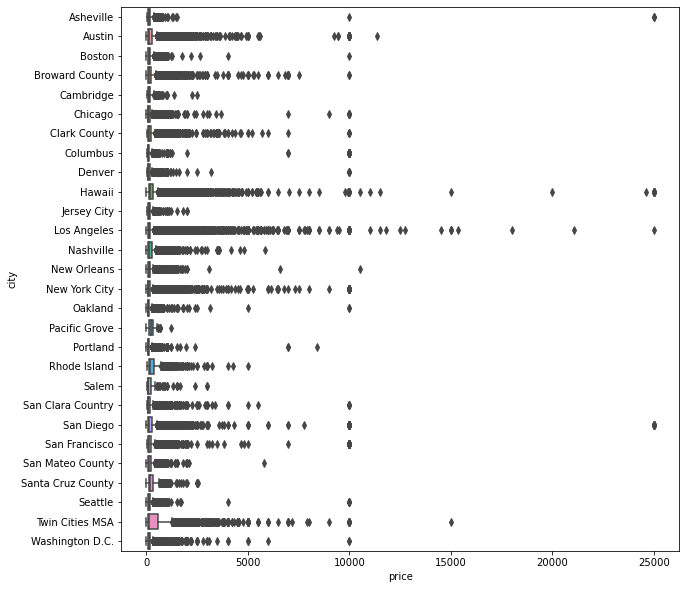

In [5]:
plt.figure(figsize = (10,10))
box_plot = sns.boxplot(x='price', y='city', 
                 data=airbnbDS)

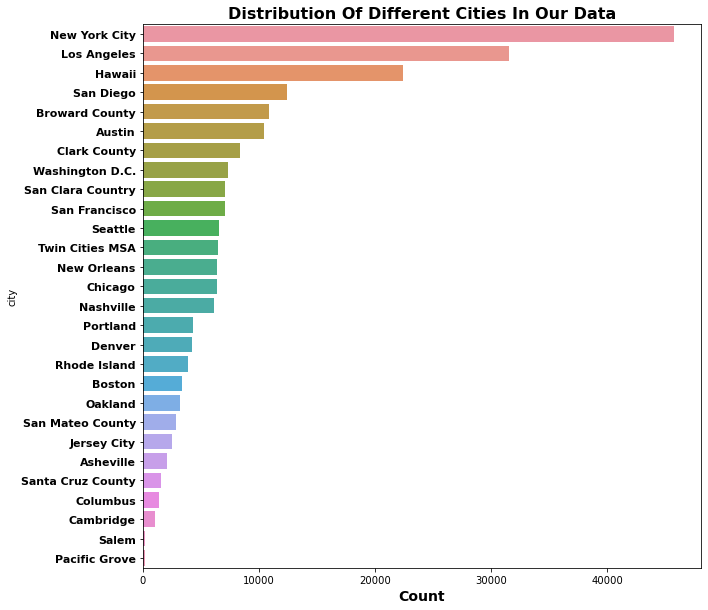

In [6]:
plt.figure(figsize = (10,10))
ax = sns.countplot(y=airbnbDS['city'],order=airbnbDS['city'].value_counts().index)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=11,fontweight='bold')
ax.set_title('Distribution Of Different Cities In Our Data',fontsize=16,fontweight='bold')
ax.set_xlabel('Count',fontsize=14,fontweight='bold')
plt.show()

Creating a profit to see how much money the property can make in a year if it is booked every day it is available

In [7]:
airbnbDS["Profit"] = airbnbDS['price'] * (airbnbDS['availability_365'])

In [8]:
airbnbDS

id                                               name  \
0          38585    Charming Victorian home - twin beds + breakfast   
1          80905                                   French Chic Loft   
2         108061  Walk to stores/parks/downtown. Fenced yard/Pet...   
3         155305                 Cottage! BonPaul + Sharky's Hostel   
4         160594                                Historic Grove Park   
...          ...                                                ...   
226025  45506143                          DC Hidden In Plain "Site"   
226026  45511428  DC 3 BR w/ screen porch 3 blck to metro w/ par...   
226027  45514685  Charming Penthouse Apt w/ Rooftop Terrace in L...   
226028  45516412                Adams Morgan/Nat'l Zoo 1 BR Apt #32   
226029  45517735    Beautiful large one-bedroom w/ washer and dryer   

          host_id  host_name  \
0          165529    Evelyne   
1          427027    Celeste   
2          320564       Lisa   
3          746673    BonPaul   
4          769252  Elizabeth   
...           ...        ...   
226025   25973146      Marci   
226026  231133074     Thomas   
226027   33758935     Bassem   
226028   23193071    Michael   
226029   17789858       Adam   

                                            neighbourhood   latitude  \
0                                                   28804  35.651460   
1                                                   28801  35.597790   
2                                                   28801  35.606700   
3                                                   28806  35.578640   
4                                                   28801  35.614420   
...                                                   ...        ...   
226025  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.903880   
226026                      Brookland, Brentwood, Langdon  38.920820   
226027                                 Shaw, Logan Circle  38.911170   
226028     Kalorama Heights, Adams Morgan, Lanier Heights  38.926630   
226029  Edgewood, Bloomingdale, Truxton Circle, Eckington  38.911569   

        longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -82.627920     Private room     60               1                138   
1      -82.555400  Entire home/apt    470               1                114   
2      -82.555630  Entire home/apt     75              30                 89   
3      -82.595780  Entire home/apt     90               1                267   
4      -82.541270     Private room    125              30                 58   
...           ...              ...    ...             ...                ...   
226025 -77.029730  Entire home/apt    104               1                  0   
226026 -76.990980  Entire home/apt    151               2                  0   
226027 -77.033540  Entire home/apt    240               2                  0   
226028 -77.044360  Entire home/apt     60              21                  0   
226029 -77.009431  Entire home/apt     79               7                  0   

       last_review  reviews_per_month  calculated_host_listings_count  \
0         16/02/20               1.14                               1   
1         07/09/20               1.03                              11   
2         30/11/19               0.81                               2   
3         22/09/20               2.39                               5   
4         19/10/15               0.52                               1   
...            ...                ...                             ...   
226025    00/00/00               0.00                               2   
226026    00/00/00               0.00                               1   
226027    00/00/00               0.00                               1   
226028    00/00/00               0.00                               5   
226029    00/00/00               0.00                               2   

        availability_365             city  room_type_ID  city_ID  Profit 

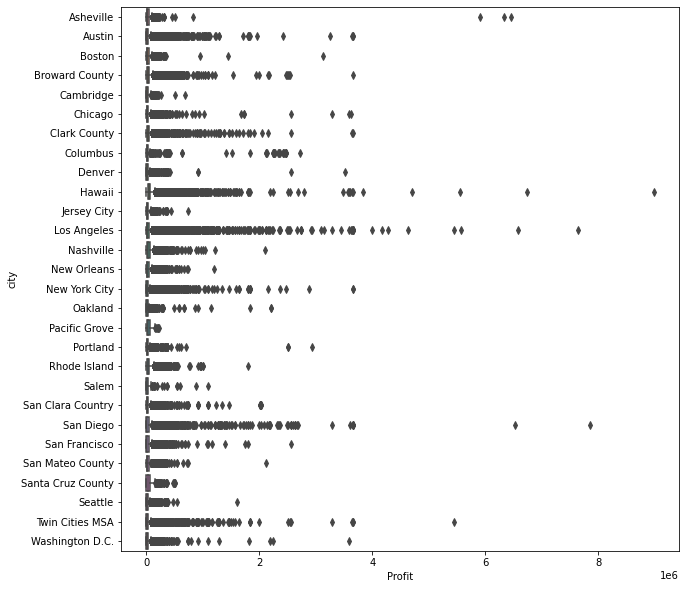

In [9]:
plt.figure(figsize = (10,10))
box_plot = sns.boxplot(x='Profit', y='city', 
                 data=airbnbDS)

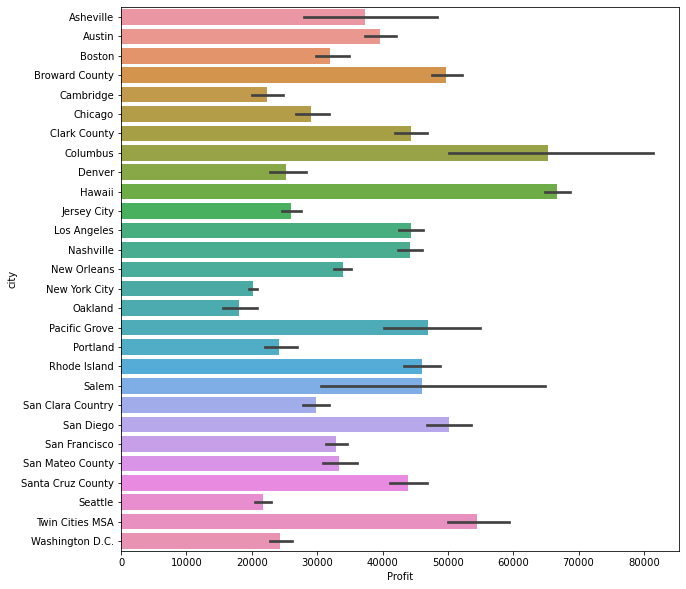

In [10]:
plt.figure(figsize = (10,10))
box_plot = sns.barplot(x='Profit', y='city', 
                 data=airbnbDS)

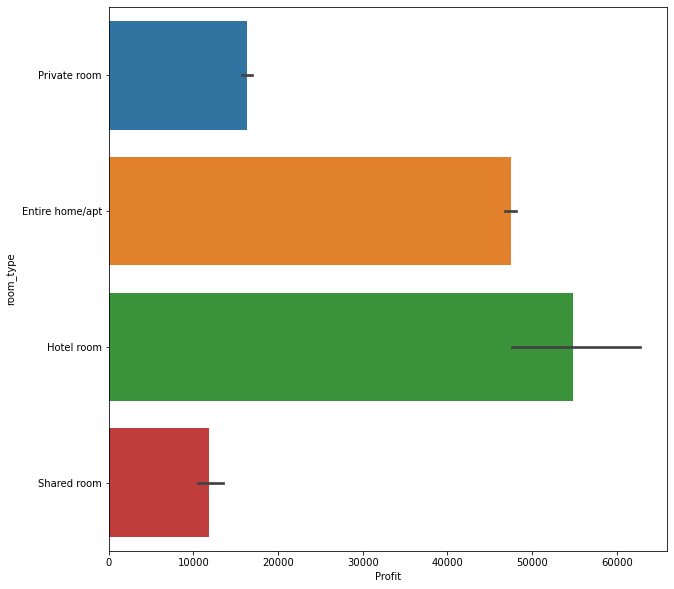

In [11]:
plt.figure(figsize = (10,10))
box_plot = sns.barplot(x='Profit', y='room_type', 
                 data=airbnbDS)

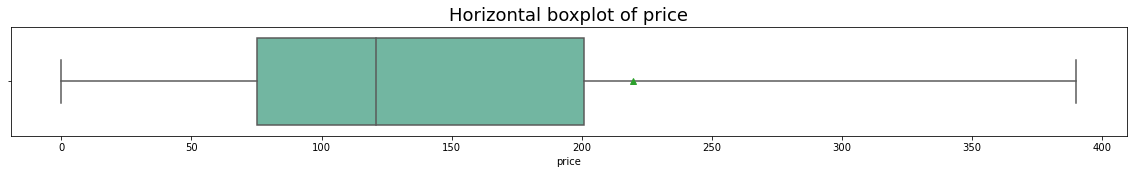

In [12]:
plt.figure(figsize=(20,2))
plt.title("Horizontal boxplot of price", size=18)
sns.boxplot(x="price", data=airbnbDS, showfliers = False, showmeans=True, palette="Set2")
plt.show()

In [13]:
airbnbDS.corr()

id   host_id  latitude  longitude  \
id                              1.000000  0.537812 -0.057875  -0.010406   
host_id                         0.537812  1.000000 -0.049197   0.009212   
latitude                       -0.057875 -0.049197  1.000000   0.579913   
longitude                      -0.010406  0.009212  0.579913   1.000000   
price                           0.021400  0.019818 -0.054397  -0.057780   
minimum_nights                 -0.001617 -0.002003  0.000647  -0.001541   
number_of_reviews              -0.381549 -0.188811  0.047353  -0.034381   
reviews_per_month              -0.047934 -0.004395  0.050783  -0.018597   
calculated_host_listings_count  0.162187  0.103270 -0.182688  -0.168422   
availability_365                0.051100  0.086512 -0.177597  -0.145708   
room_type_ID                   -0.002708  0.057841  0.143331   0.115419   
city_ID                        -0.089886 -0.083705  0.460668  -0.021745   
Profit                          0.029362  0.027519 -0.091700  -0.078803   

                                   price  minimum_nights  number_of_reviews  \
id                              0.021400       -0.001617          -0.381549   
host_id                         0.019818       -0.002003          -0.188811   
latitude                       -0.054397        0.000647           0.047353   
longitude                      -0.057780       -0.001541          -0.034381   
price                           1.000000       -0.000560          -0.072522   
minimum_nights                 -0.000560        1.000000          -0.000886   
number_of_reviews              -0.072522       -0.000886           1.000000   
reviews_per_month              -0.077620       -0.001266           0.757347   
calculated_host_listings_count  0.043074       -0.000638          -0.119576   
availability_365                0.035139       -0.002381           0.052081   
room_type_ID                   -0.114010        0.002419          -0.042672   
city_ID                         0.013962        0.002731           0.037585   
Profit                          0.693595       -0.000641          -0.050366   

                                reviews_per_month  \
id                                      -0.047934   
host_id                                 -0.004395   
latitude                                 0.050783   
longitude                               -0.018597   
price                                   -0.077620   
minimum_nights                          -0.001266   
number_of_reviews                        0.757347   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.133765   
availability_365                         0.028342   
room_type_ID                            -0.073015   
city_ID                                  0.010695   
Profit                                  -0.057460   

                                calculated_host_listings_count  \
id                                                    0.162187   
host_id                                               0.103270   
latitude                                             -0.182688   
longitude                                            -0.168422   
price                                                 0.043074   
minimum_nights                                       -0.000638   
number_of_reviews                                    -0.119576   
reviews_per_month                                    -0.133765   
calculated_host_listings_count                        1.000000   
availability_365                                      0.162445   
room_type_ID                                         -0.101972   
city_ID                                              -0.086068   
Profit                                                0.052079   

                                availability_365  room_type_ID   city_ID  \
id                                      0.051100     -0.002708 -0.089886   
host_id                                 0.086512      0.0578

Price does not have any correlations besides our self created column of price and a small correlation between room available. 